<a href="https://colab.research.google.com/github/Bamkole25/Freecodecamp-Projects/blob/main/fcc_predict_health_costs_with_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-04-24 10:21:17--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2024-04-24 10:21:17 (95.0 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
for column in dataset:
    if dataset[column].nunique() < 10:
        print(column, "=", pd.unique(dataset[column]))
    else:
        print(column, "have", dataset[column].nunique(), "different values.")

age have 47 different values.
sex = ['female' 'male']
bmi have 275 different values.
children = [0 1 3 2 5 4]
smoker = ['yes' 'no']
region = ['southwest' 'southeast' 'northwest' 'northeast']
expenses have 1337 different values.


In [11]:
# Convert categorical data to numbers
#df = pd.get_dummies(dataset, columns=['sex', 'smoker', 'region'])
prepared_data = dataset.copy()
prepared_data['smoker'] = prepared_data['smoker'].map({'no': 0, 'yes': 1})
prepared_data['sex'] = prepared_data['sex'].map({'female': 1, 'male': 0})
prepared_data = pd.get_dummies(
    prepared_data,
    columns=['region'],
    prefix='',
    prefix_sep=''
)

prepared_data = prepared_data.replace({True: 1, False: 0})
prepared_data.tail()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast,southwest
1333,50,0,31.0,3,0,10600.55,0,1,0,0
1334,18,1,31.9,0,0,2205.98,1,0,0,0
1335,18,1,36.9,0,0,1629.83,0,0,1,0
1336,21,1,25.8,0,0,2007.95,0,0,0,1
1337,61,1,29.1,0,1,29141.36,0,1,0,0


In [12]:
from sklearn.model_selection import train_test_split

tts_data = prepared_data.copy()


# Pop off the "expenses" column
X = tts_data.drop('expenses', axis = 1)
Y = tts_data.pop('expenses')

# Split the data into train and test datasets
train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    X, Y,
    test_size=0.2
)


test_dataset.tail()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
828,41,0,30.8,3,1,1,0,0,0
1059,32,0,33.8,1,0,0,1,0,0
100,41,1,31.6,0,0,0,0,0,1
1303,43,0,27.8,0,1,0,0,0,1
808,18,0,30.1,0,0,0,0,1,0


In [15]:
from tensorflow.keras.layers.experimental import preprocessing

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [17]:
# Create the model
model = tf.keras.models.Sequential([
  normalizer,
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation=None)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error', 'mean_squared_error'])

In [24]:
# Train the model
history = model.fit(train_dataset, train_labels, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 11ms/step - loss: 2687.7192 - mean_absolute_error: 2687.7192 - mean_squared_error: 34433424.0000
Epoch 2/200
34/34 [==============================] - 0s 11ms/step - loss: 2681.1948 - mean_absolute_error: 2681.1948 - mean_squared_error: 34350184.0000
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 2675.0215 - mean_absolute_error: 2675.0215 - mean_squared_error: 34140464.0000
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 2665.3689 - mean_absolute_error: 2665.3689 - mean_squared_error: 34075312.0000
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 2657.3811 - mean_absolute_error: 2657.3811 - mean_squared_error: 33812040.0000
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 2648.6455 - mean_absolute_error: 2648.6455 - mean_squared_error: 33579056.0000
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 2640.3860 - m

In [25]:
model.evaluate(
    test_dataset,
    test_labels,
    verbose=1
)

9/9 [==============================] - 0s 4ms/step - loss: 1844.2687 - mean_absolute_error: 1844.2687 - mean_squared_error: 22279710.0000


[1844.2686767578125, 1844.2686767578125, 22279710.0]

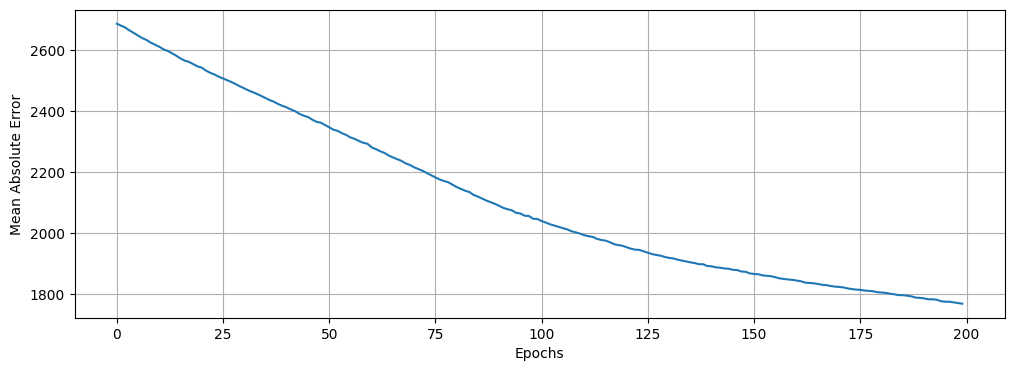

In [26]:
plt.figure(figsize=(12,4))
plt.plot(
    history.history['mean_absolute_error']
)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.grid(True)
plt.show()

9/9 - 0s - loss: 1844.2687 - mean_absolute_error: 1844.2687 - mean_squared_error: 22279710.0000 - 40ms/epoch - 4ms/step
Testing set Mean Abs Error: 1844.27 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


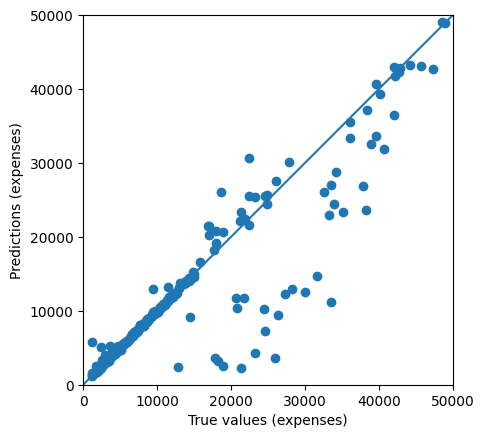

In [28]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
